In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime
import math

In [ ]:
#loading the dataset
retail_df = pd.read_csv("/content/drive/MyDrive/Datasets/Online Retail.csv")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
#checking datatypes of columns
retail_df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
#data cleaning
retail_df = retail_df[(retail_df["Quantity"]) > 0 & (retail_df["UnitPrice"] > 0)]
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
#converting CustomerID column to string and removing decimal
retail_df["CustomerID"] = retail_df["CustomerID"].astype(str)
retail_df["CustomerID"] = retail_df["CustomerID"].apply(lambda x : x[:-2])
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom


In [ ]:
#creating new column called Total_Price
retail_df["Total_Price"] = retail_df["Quantity"] * retail_df["UnitPrice"]
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850,United Kingdom,20.34


In [ ]:
#converting InvoiceDate to datetime column
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"], format = "%m/%d/%y %H:%M")
retail_df["InvoiceDate"] = retail_df["InvoiceDate"]
retail_df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
Total_Price           float64
dtype: object

In [ ]:
#checking the latest date
retail_df["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [ ]:
#getting last date on which to calculate recency
rfm_df = pd.DataFrame()
current_date = datetime.datetime(2011, 12, 10)

In [ ]:
#creating RFM columns
rfm_df["Recency"] = retail_df.groupby("CustomerID").agg({"InvoiceDate" : lambda x : (current_date - x.max()).days})
rfm_df["Frequency"] = retail_df.groupby("CustomerID").agg({"CustomerID": "count"})
rfm_df["Monetary"] = retail_df.groupby("CustomerID").agg({"Total_Price" : lambda x : x.sum()})
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,325,1,77183.60
12347,2,182,4310.00
12348,75,31,1797.24
12349,18,73,1757.55
12350,310,17,334.40


##Data Exploration

<Axes: ylabel='Density'>

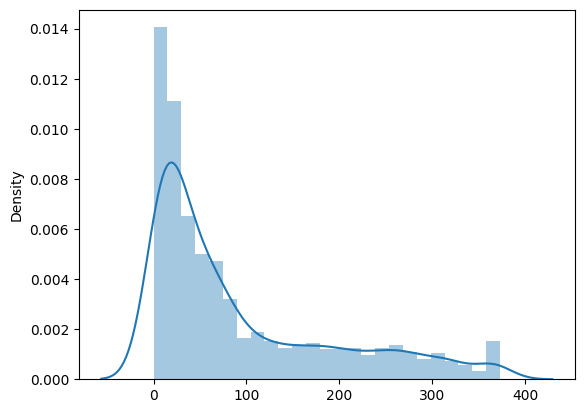

In [ ]:
#distribution plot of Recency
sns.distplot(x = rfm_df["Recency"])

<Axes: ylabel='Density'>

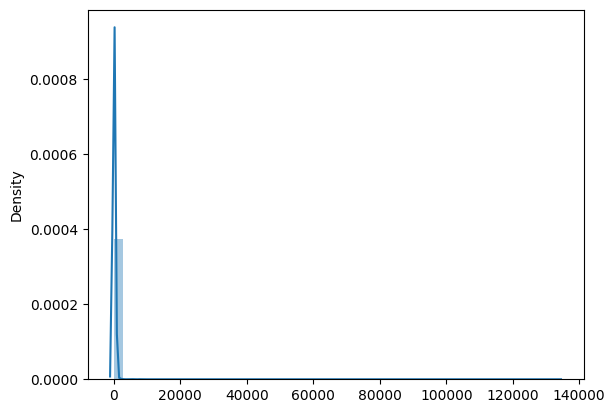

In [ ]:
#distribution plot of Frequency
sns.distplot(x = rfm_df["Frequency"])

<Axes: ylabel='Density'>

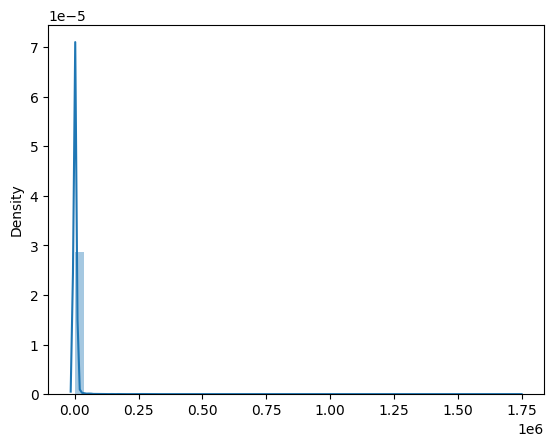

In [ ]:
#distribution plot of Monetary
sns.distplot(x = rfm_df["Monetary"])

##Data Preprocessing

In [ ]:
#declaring function to remove negative values
def handle_negative(x):
  if x <= 0:
    return 1
  else:
    return x

In [ ]:
#data cleaning - removing negative values
rfm_df["Recency"] = rfm_df["Recency"].apply(handle_negative)
rfm_df["Frequency"] = rfm_df["Frequency"].apply(handle_negative)
rfm_df["Monetary"] = rfm_df["Monetary"].apply(handle_negative)

In [ ]:
#applying log - part of data preprocessing before feeding to model
rfm_df["Recency_log"] = rfm_df["Recency"].apply(math.log)
rfm_df["Frequency_log"] = rfm_df["Frequency"].apply(math.log)
rfm_df["Monetary_log"] = rfm_df["Monetary"].apply(math.log)
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,
12346,325,1,77183.60,5.783825,0.000000,11.253942
12347,2,182,4310.00,0.693147,5.204007,8.368693
12348,75,31,1797.24,4.317488,3.433987,7.494007
12349,18,73,1757.55,2.890372,4.290459,7.471676
12350,310,17,334.40,5.736572,2.833213,5.812338


<Axes: ylabel='Density'>

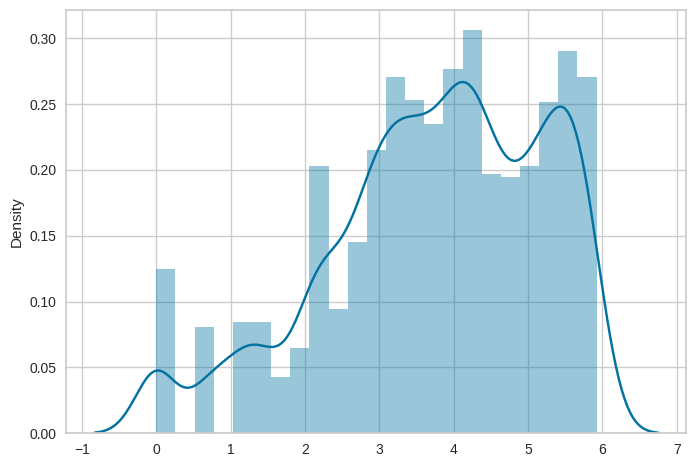

In [ ]:
#distribution plot of Recency_log
sns.distplot(x = rfm_df["Recency_log"])

<Axes: xlabel='Frequency_log', ylabel='Density'>

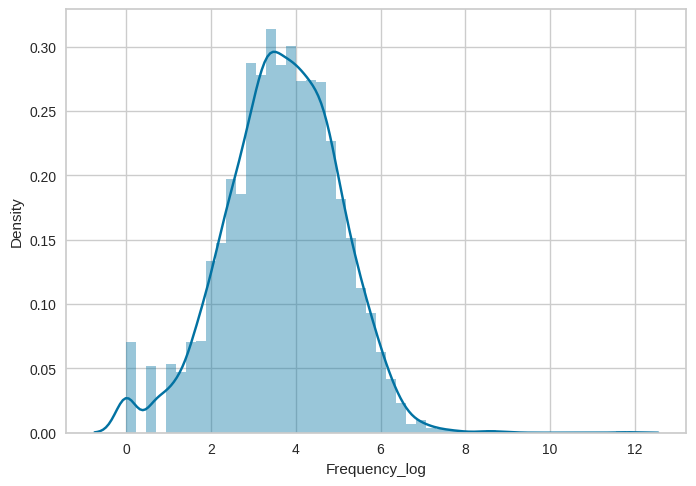

In [ ]:
#distribution plot of Frequency_log
sns.distplot(rfm_df["Frequency_log"])

<Axes: ylabel='Density'>

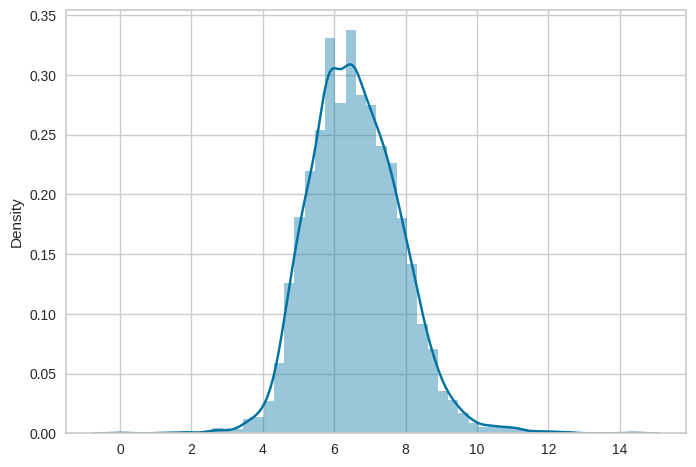

In [ ]:
#distribution plot of Monetary_log
sns.distplot(x = rfm_df["Monetary_log"])

In [ ]:
#data preprocessing - scaling to mean of 0 and std of 1
from sklearn.preprocessing import StandardScaler
X = rfm_df[["Recency_log", "Frequency_log", "Monetary_log"]].values
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X)
X

array([[ 1.38808153e+00, -2.76275773e+00,  3.67179907e+00],
       [-2.06257491e+00,  1.14312292e+00,  1.39980428e+00],
       [ 3.94142130e-01, -1.85369773e-01,  7.11031359e-01],
       ...,
       [-1.78773513e+00,  2.21193583e+00,  8.31703725e-01],
       [ 1.11895670e-03,  4.25961337e-01,  7.28382122e-01],
       [-2.53241660e+00,  6.09437444e+00,  6.12196366e+00]])

##Model Training

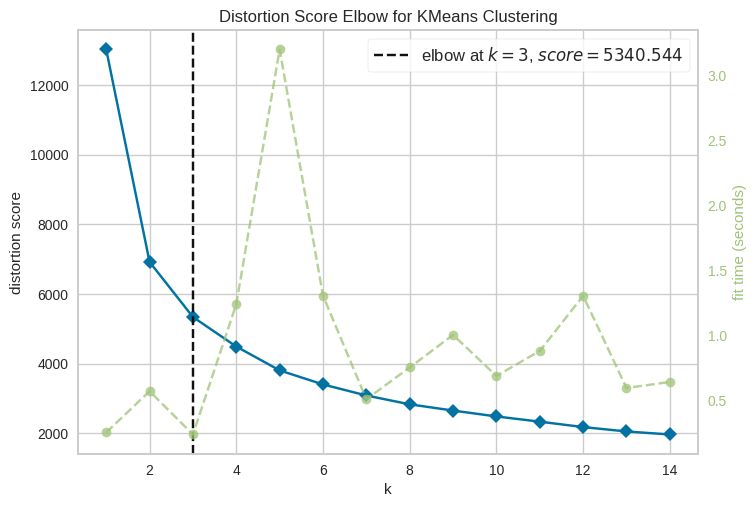

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Elbow method to find out ideal number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model_inertia = {}
for i in range(1, 15):
  model = KMeans(n_clusters = i, init = "k-means++", max_iter = 1000, random_state = 42)
  model.fit(X)
  model_inertia[i] = model.inertia_

visualizer = KElbowVisualizer(model, k = (1, 15), metric = "distortion", timing = False)
visualizer.fit(X)
visualizer.poof()

In [ ]:
#creating model with 3 clusters
model_3_cluster = KMeans(n_clusters = 3, init = "k-means++", max_iter = 1000, random_state = 42)
model_3_cluster.fit(X)
rfm_df["Labels"] = model_3_cluster.labels_
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Labels
CustomerID,,,,,,,
12346,325,1,77183.60,5.783825,0.000000,11.253942,2
12347,2,182,4310.00,0.693147,5.204007,8.368693,1
12348,75,31,1797.24,4.317488,3.433987,7.494007,2
12349,18,73,1757.55,2.890372,4.290459,7.471676,2
12350,310,17,334.40,5.736572,2.833213,5.812338,0


In [ ]:
#getting the cluster centers of the fit model
centers = model_3_cluster.cluster_centers_
centers

array([[ 0.70050427, -0.9657048 , -0.90905029],
       [-1.26366796,  1.12658259,  1.19995217],
       [ 0.04136866,  0.25138083,  0.16675132]])

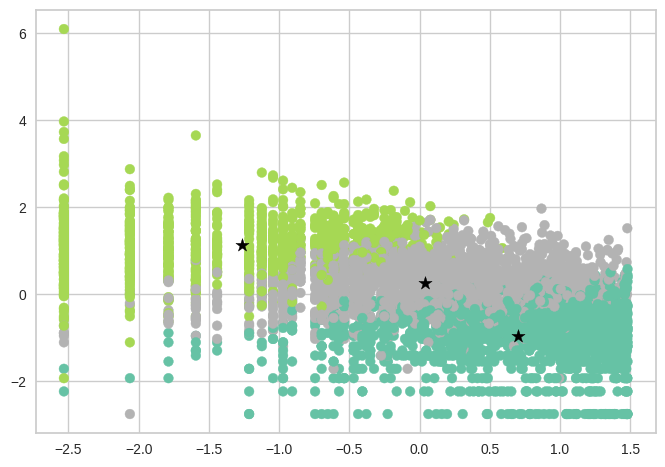

In [ ]:
#scatter plot of data points and cluster centers
plt.scatter(x = X[:, 0], y = X[:, 1], c = rfm_df["Labels"], cmap = "Set2")
plt.scatter(x = centers[:, 0], y = centers[:, 1], s = 100, c = "black", marker = "*")
plt.show()

In [ ]:
#showing the first 5 rows of the dataframe
rfm_df.head(5)

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Labels
CustomerID,,,,,,,
12346,325,1,77183.60,5.783825,0.000000,11.253942,2
12347,2,182,4310.00,0.693147,5.204007,8.368693,1
12348,75,31,1797.24,4.317488,3.433987,7.494007,2
12349,18,73,1757.55,2.890372,4.290459,7.471676,2
12350,310,17,334.40,5.736572,2.833213,5.812338,0


In [ ]:
#getting quantile values of Recency
rfm_df["Recency"].quantile([0.25, 0.5, 0.75])

0.25     17.00
0.50     50.00
0.75    141.25
Name: Recency, dtype: float64

In [ ]:
#function to create score depending on value falling in certain quantile
def R_Score(x):
  if x <= 17:
    return 4
  elif x <= 50:
    return 3
  elif x <= 141.25:
    return 2
  else:
    return 1

In [ ]:
#getting quantile values of Frequency
rfm_df["Frequency"].quantile([0.25, 0.5, 0.75])

0.25     17.0
0.50     41.0
0.75    100.0
Name: Frequency, dtype: float64

In [ ]:
#function to create score depending on value falling in certain quantile
def F_Score(x):
  if x <= 17:
    return 1
  elif x <= 41:
    return 2
  elif x <= 100:
    return 3
  else:
    return 4

In [ ]:
#getting quantile values of Monetary
rfm_df["Monetary"].quantile([0.25, 0.5, 0.75])

0.25     307.3225
0.50     674.4850
0.75    1661.9500
Name: Monetary, dtype: float64

In [ ]:
#function to create score depending on value falling in certain quantile
def M_Score(x):
  if x <= 307.3255:
    return 1
  elif x <= 674.4850:
    return 2
  elif x <= 1661.9500:
    return 3
  else:
    return 4

In [ ]:
#applying function to create score columns
rfm_df["R_Score"] = rfm_df["Recency"].apply(R_Score)
rfm_df["F_Score"] = rfm_df["Frequency"].apply(F_Score)
rfm_df["M_Score"] = rfm_df["Monetary"].apply(M_Score)
rfm_df.head()

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Labels,R_Score,F_Score,M_Score
CustomerID,,,,,,,,,,
12346,325,1,77183.60,5.783825,0.000000,11.253942,2,1,1,4
12347,2,182,4310.00,0.693147,5.204007,8.368693,1,4,4,4
12348,75,31,1797.24,4.317488,3.433987,7.494007,2,2,2,4
12349,18,73,1757.55,2.890372,4.290459,7.471676,2,3,3,4
12350,310,17,334.40,5.736572,2.833213,5.812338,0,1,1,2


In [ ]:
#creating total/overall score of RFM
rfm_df["RFM_Score"] = rfm_df["R_Score"] + rfm_df["F_Score"] + rfm_df["M_Score"]
rfm_df.head(15)

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,Labels,R_Score,F_Score,M_Score,RFM_Score
CustomerID,,,,,,,,,,,
12346,325,1,77183.60,5.783825,0.000000,11.253942,2,1,1,4,6
12347,2,182,4310.00,0.693147,5.204007,8.368693,1,4,4,4,12
12348,75,31,1797.24,4.317488,3.433987,7.494007,2,2,2,4,8
12349,18,73,1757.55,2.890372,4.290459,7.471676,2,3,3,4,10
12350,310,17,334.40,5.736572,2.833213,5.812338,0,1,1,2,4
12352,36,85,2506.04,3.583519,4.442651,7.826459,2,3,3,4,10
12353,204,4,89.00,5.318120,1.386294,4.488636,0,1,1,1,3
12354,232,58,1079.40,5.446737,4.060443,6.984161,2,1,3,3,7
12355,214,13,459.40,5.365976,2.564949,6.129921,0,1,1,2,4


In [ ]:
#Getting the cluster average values depending on the Labels to get a bigger picture
cluster_averages = rfm_df.groupby("Labels").mean()
cluster_averages

,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log,R_Score,F_Score,M_Score,RFM_Score
Labels,,,,,,,,,,
0,167.309859,15.089629,296.527075,4.769507,2.393832,5.436011,1.693982,1.366837,1.425096,4.485915
1,11.451128,408.058002,8492.912180,1.872580,5.176154,8.111199,3.769066,3.715360,3.757250,11.241676
2,68.979426,69.200325,1231.448237,3.801288,4.015822,6.801627,2.557120,2.825122,2.775311,8.157553


##Insights:
There are three types of customers, according the the KMeans clustering algorithm:

1. Label 0: Has not made purchase in the past 167 days, but has made around 15 purchases previously and spent among 296 dollars. These are dormant customer or customers that the store is going to lose. So, they can be targeted with Customer Engagement Campaigns, so that they start again to make new purchases.

2. Label 1: Has made the last purchase in around 11 days before, has a frequency of making 408 purchases and spent around 8492 dollars in the store.
These are the loyal customers. They can be given promotional offers and should be included in referral system.

3. Label 2: Has made the last purchase in around 68 days before, has a frequency of making 69 purchases and spent around 1231 dollars. These are active customers who haven't made purchases in a while. They can be targeted with promotional offers, so that their recency and frequency of purchase increases.